In [4]:
#######################
# Interpolates some f #
#######################
import radiant as rad
import numpy as np


# Problem Parameters
a = -1
b = 1


def f(x):
    return np.cos((2 * np.pi * x / (b - a)) ** 2) * 2 * np.pi * x / (b - a)

In [5]:
# Parameters
d = 1
k = 1
ncentres = 100
delta = 0.1

# Computed Parameters
phi = rad.Wendland(d, k)
centres = np.linspace(a, b, ncentres)
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Solve for approximate solution
solver = rad.solve.InterpolationSolver(phi, centres, delta)
approx = solver.solve(f)
error = rad.error(f, approx, error_integrator)

print("L2 Relative Error:", error)
print("Condition Number:", solver.cond())

L2 Relative Error: 0.0011128823835494567
Condition Number: 481.56204473209255


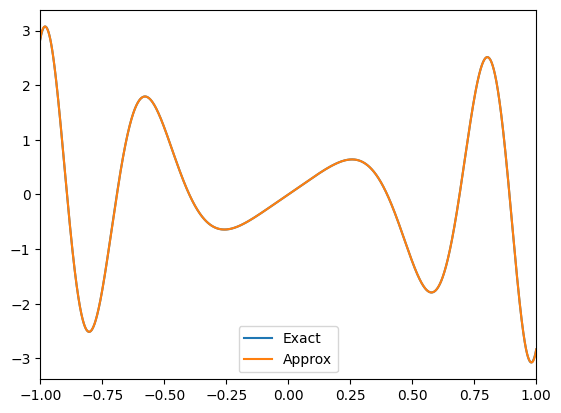

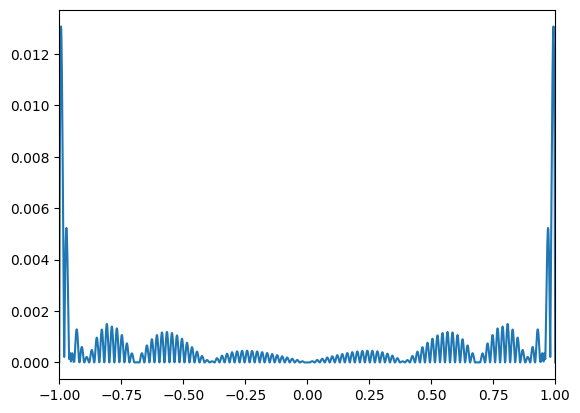

In [6]:
rad.plot.many(a, b, f, approx, n=5000, labels=["Exact", "Approx"])
rad.plot.difference(a, b, f, approx)